In [1]:
import pandas as pd
import importlib
import os
from ast import literal_eval
import numpy as np
import pickle
import gc
from sklearn.model_selection import train_test_split
%matplotlib notebook

In [2]:
#df.to_pickle('../../data/model_df_cleaned0609')
df = pd.read_pickle('../../data/model_df_cleaned0609')

In [3]:
df

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,_id,artist,chord,error,rating,tab_href,tab_title,...,song_name,song_detector_chord,song_chord,chord_before_tf,song_chord_toCkey,star,visitors_0530,tab_dtw_cost,chord_alignment_by_dtw,songchord_alignment_by_dtw
0,69,69,103,5cada0119fc5af34a460af19,a-ha,"[E:maj, D:maj, A:maj, D:maj, E:maj, D:maj, A:m...",0,6,https://tabs.ultimate-guitar.com/tab/a-ha/trai...,Train Of Thought,...,Train Of Thought a-ha,"[{'st': 0, 'et': 3.762, 'ochord': 'N'}, {'st':...","[N, N, N, C:maj, D:maj, N, E:min, D:maj, E:maj...","[E:maj, D:maj, A:maj, D:maj, E:maj, D:maj, A:m...","[N, N, N, N, F:maj, N, G:min, F:maj, G:maj, N,...",4.5,6,49.8,"[E:maj, N, N, N, D:maj, N, A:maj, D:maj, E:maj...","[N, N, N, C:maj, D:maj, N, E:min, D:maj, E:maj..."
1,70,70,104,5cada0119fc5af34a460af1d,a-ha,"[Gb:min, A:maj, A:maj, D:maj, G:maj, Gb:min, A...",0,4,https://tabs.ultimate-guitar.com/tab/a-ha/unde...,Under The Makeup,...,Under The Makeup a-ha,"[{'st': 0, 'et': 7.384, 'ochord': 'N'}, {'st':...","[N, N, Gb:maj, A:maj, D:maj, G:maj, B:maj, Gb:...","[Gb:min, A:maj, A:maj, D:maj, G:maj, Gb:min, A...","[N, N, E:maj, G:maj, C:maj, F:maj, A:maj, E:ma...",4.0,5,39.3,"[Gb:min, N, N, A:maj, A:maj, D:maj, G:maj, N, ...","[N, N, Gb:maj, A:maj, N, D:maj, G:maj, B:maj, ..."
2,71,71,105,5cada0119fc5af34a460af1f,a-ha,"[Db:maj, Db:min, Db:maj, Gb:min, A:maj, D:maj,...",0,7,https://tabs.ultimate-guitar.com/tab/a-ha/unde...,Under The Makeup,...,Under The Makeup a-ha,"[{'st': 0, 'et': 7.384, 'ochord': 'N'}, {'st':...","[N, N, Gb:maj, A:maj, D:maj, G:maj, B:maj, Gb:...","[Db:maj, Db:min, Db:maj, Gb:min, A:maj, D:maj,...","[N, N, E:maj, G:maj, C:maj, F:maj, A:maj, E:ma...",4.5,7,38.5,"[Db:maj, Db:min, Db:maj, Gb:min, A:maj, D:maj,...","[N, N, Gb:maj, N, A:maj, D:maj, G:maj, B:maj, ..."
3,72,72,106,5cada0129fc5af34a460af23,a-ha,"[G:maj, D:maj, A:maj, C:maj, G:maj, D:maj, A:m...",0,29,https://tabs.ultimate-guitar.com/tab/a-ha/velv...,Velvet,...,Velvet a-ha,"[{'st': 0, 'et': 4.365, 'ochord': 'C'}, {'st':...","[C:maj, C:maj, C:maj, A:min, C:maj, F:maj, C:m...","[C:maj, G:maj, D:maj, F:maj, C:maj, G:maj, D:m...","[F:maj, F:maj, F:maj, D:min, F:maj, N, F:maj, ...",4.5,29,45.0,"[G:maj, N, D:maj, A:maj, C:maj, N, N, G:maj, D...","[C:maj, C:maj, C:maj, A:min, C:maj, F:maj, C:m..."
4,73,73,107,5cada0129fc5af34a460af25,a-ha,"[G:maj, D:maj, A:min, C:maj, G:maj, D:maj, A:m...",0,11,https://tabs.ultimate-guitar.com/tab/a-ha/velv...,Velvet,...,Velvet a-ha,"[{'st': 0, 'et': 4.365, 'ochord': 'C'}, {'st':...","[C:maj, C:maj, C:maj, A:min, C:maj, F:maj, C:m...","[G:maj, D:maj, A:min, C:maj, G:maj, D:maj, A:m...","[F:maj, F:maj, F:maj, D:min, F:maj, N, F:maj, ...",4.0,11,43.2,"[G:maj, D:maj, A:min, N, C:maj, N, N, G:maj, D...","[C:maj, C:maj, C:maj, A:min, C:maj, F:maj, C:m..."
5,74,74,108,5cada0129fc5af34a460af2d,a-ha,"[Bb:min, Eb:min, Ab:maj, Bb:min, Bb:min, Eb:mi...",0,7,https://tabs.ultimate-guitar.com/tab/a-ha/youl...,Youll Never Get Over Me,...,Youll Never Get Over Me a-ha,"[{'st': 0, 'et': 0.395, 'ochord': 'F#:min'}, {...","[Gb:maj, Ab:maj, Bb:maj, Db:maj, Gb:maj, Ab:ma...","[E:min, A:min, D:maj, E:min, E:min, A:min, G:m...","[F:maj, G:maj, A:maj, C:maj, F:maj, G:maj, G:m...",4.5,7,78.2,"[Bb:min, N, N, N, Eb:min, Ab:maj, N, N, N, N, ...","[Gb:maj, Ab:maj, Bb:maj, Db:maj, Gb:maj, Ab:ma..."
6,75,75,109,5cada0129fc5af34a460af2f,ABBA,"[C:maj, G:maj, F:maj, C:maj, F:maj, C:maj, G:m...",0,91,https://tabs.ultimate-guitar.com/tab/abba/anda...,Andante Andante,...,Andante Andante ABBA,"[{'st': 0, 'et': 1.974, 'ochord': 'D'}, {'st':...","[D:maj, F:maj, C:maj, F:maj, Bb:maj, F:maj, C:...","[F:maj, C:maj, Bb:maj, F:maj, Bb:maj, F:maj, C...","[A:maj, C:maj, G:maj, C:maj, F:maj, C:maj, G:m...",5.0,108,42.6,"[C:maj, G:maj, F:maj, C:maj, F:maj, N, N, C:ma...","[D:maj, N, F:maj, C:maj, F:maj, Bb:maj, F:maj,..."
7,76,76,110,5cada0129fc5af34a460af31,ABBA,"[Gb:maj, E:maj, Gb:maj, E:maj, Gb:maj, B:maj, ...",0,29,https://tabs.ultimate-guitar.com/tab/abba/ange...,Angeleyes,...,Angeleyes 

In [5]:
def status(x) : 
    return pd.Series([x.count(),x.min(),x.idxmin(),x.quantile(.05),x.quantile(.25),x.median(),
                      x.quantile(.75),x.quantile(.95),x.mean(),x.max(),x.idxmax(),x.mad(),x.var(),
                      x.std(),x.skew(),x.kurt()],index=['總數','最小值','最小值位置','5%分位數','25%分位數',
                    '中位數','75%分位數','95%分位數','均值','最大值','最大值位數','平均絕對偏差','方差','標準差','偏度','峰度'])


In [6]:
print(status(df.visitors_0530))

總數         17240.000000
最小值            3.000000
最小值位置          9.000000
5%分位數          3.000000
25%分位數         5.000000
中位數           11.000000
75%分位數        31.000000
95%分位數       210.000000
均值            60.992053
最大值        20478.000000
最大值位數       4285.000000
平均絕對偏差        80.062609
方差        116905.002025
標準差          341.913735
偏度            27.496698
峰度          1131.567157
dtype: float64


In [49]:
df.groupby('song_name').size()

song_name
0 Interest Jason Mraz                                            1
00000 Million Bon Iver                                           2
1 2 3 Sofia Reyes feat. Jason Derulo & De La Ghetto              1
10 Bon Iver                                                      1
10 Sorry Jonas Brothers                                          1
100 Years Florence + The Machine                                 1
1000 Things Jason Mraz                                           1
1000 Times Sara Bareilles                                        1
10000 Promises Backstreet Boys                                   1
102 The 1975                                                     2
10538 Overture Electric Light Orchestra                          1
1234 Goodbye Demi Lovato                                         2
13 Beaches Lana Del Rey                                          1
15 Step Radiohead                                                2
16 Tons Tom Jones                                   

In [55]:
len(df[(df['star']<=4.5) &  (df['visitors_0530']<=30) ])

9247

In [6]:
print(status(df.star))

總數        17240.000000
最小值           2.000000
最小值位置      6966.000000
5%分位數         4.000000
25%分位數        4.500000
中位數           4.500000
75%分位數        5.000000
95%分位數        5.000000
均值            4.572129
最大值           5.000000
最大值位數         6.000000
平均絕對偏差        0.303828
方差            0.171823
標準差           0.414515
偏度           -1.194161
峰度            2.284715
dtype: float64


In [26]:
df2=pd.DataFrame(df['rating'])

In [55]:
df2=pd.DataFrame(df.chord.apply(cp.key_estimate))

In [57]:
df2=df2.chord.apply(pd.Series)

In [59]:
df2['rating']=df.rating

In [66]:
df2

,estimate_key,estimate_key_profile,rating
0,G,"[G, A, B, C, D, E, Gb]",9
1,G,"[G, A, B, C, D, E, Gb]",3
2,F,"[F, G, A, Bb, C, D, E]",4
3,Eb,"[Eb, F, G, Ab, Bb, C, D]",5
10,D,"[D, E, Gb, G, A, B, Db]",4
12,E,"[E, Gb, Ab, A, B, Db, Fb]",222
13,E,"[E, Gb, Ab, A, B, Db, Fb]",34
14,E,"[E, Gb, Ab, A, B, Db, Fb]",38
15,E,"[E, Gb, Ab, A, B, Db, Fb]",41
16,C,"[C, D, E, F, G, A, B]",3


In [91]:
df2_filtered= df2.loc[df2['rating'] <200]

In [100]:
print(status(df2.loc[df2['estimate_key'] =='A'].rating))

總數         1214.000000
最小值           3.000000
最小值位置        61.000000
5%分位數         3.000000
25%分位數        5.000000
中位數          11.000000
75%分位數       34.000000
95%分位數      291.350000
均值           63.683690
最大值        5639.000000
最大值位數       409.000000
平均絕對偏差       83.052276
方差        60660.528060
標準差         246.293581
偏度           13.079334
峰度          243.813229
dtype: float64


<IPython.core.display.Javascript object>


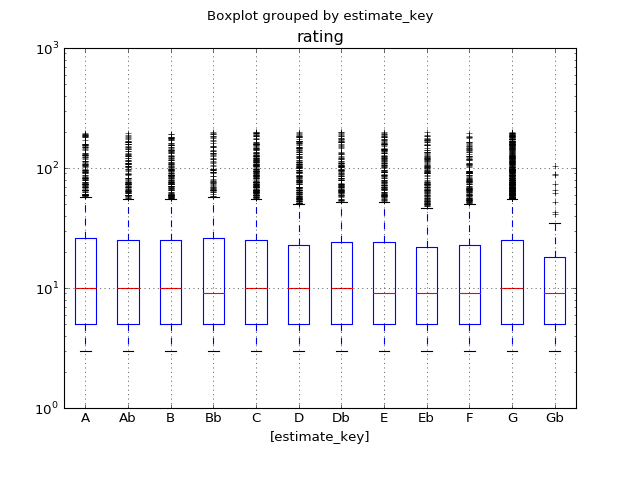

In [96]:
boxplot=df2_filtered.boxplot(by='estimate_key')
boxplot.set_yscale('log')